In [1]:
%pip install -r ~/code/GitHub/UPennContrast/devops/girder/annotation_client/requirements.txt
%pip install -e ~/code/GitHub/UPennContrast/devops/girder/annotation_client/
%pip install pandas
%pip install imageio
%pip install rtree
%pip install scikit-image
%pip install shapely
%pip install nd2reader
%pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///Users/arjunraj/code/GitHub/UPennContrast/devops/girder/annotation_client
  Attempting uninstall: annotation-client
    Found existing installation: annotation-client 0.1
    Uninstalling annotation-client-0.1:
      Successfully uninstalled annotation-client-0.1
  Running setup.py develop for annotation-client
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading 

In [24]:
import girder_client
import annotation_client.annotations as annotations
import annotation_client.tiles as tiles
import annotation_client.workers as workers
import pandas as pd
import annotation_tools
#import imageio
from shapely.geometry import Point, Polygon, LineString
#pd.set_option('display.max_colwidth', None)
import numpy as np
from skimage import draw
from skimage import morphology


In [4]:
apiUrl = 'http://localhost:8080/api/v1'
username = 'admin'
password = 'password'

In [5]:
client = girder_client.GirderClient(apiUrl=apiUrl)
user_id = client.authenticate(username=username, password=password)['_id']
annotationClient = annotations.UPennContrastAnnotationClient(apiUrl=apiUrl, token=client.token)

In [6]:
datasets = dict()
for folder in annotationClient.client.listFolder(user_id,'user'):
    for dataset in annotationClient.client.listFolder(folder['_id']):
        datasets[dataset['name']] = dataset['_id']

pd.DataFrame(datasets.keys(),columns=['Dataset Name'])

,Dataset Name
0,Connection_testing_normmedia_8well_col2_livece...
1,DDX58_AXL_EGFR_well2
2,i
3,img000_000_000000_0000000000.ome
4,myfile
5,NEW_GOLNAZ
6,NEWTEST
7,output.ome
8,output_file
9,output_file2


In [7]:
#dataset_name = '300cell-gastruloids_E11_1_04d16h00m'
#dataset_name = 'CONNECT_TIME_normmedia_8well_col2_livecellgfp'
dataset_name = 'DDX58_AXL_EGFR_well2'

In [8]:
datasetId = datasets[dataset_name]
datasetClient = tiles.UPennContrastDataset(apiUrl=apiUrl, token=client.token, datasetId=datasetId)
print(datasetClient.tiles)
tile_width = datasetClient.tiles['tileWidth']
tile_height = datasetClient.tiles['tileHeight']
print(tile_width)
print(tile_height)

{'IndexRange': {'IndexC': 5, 'IndexXY': 10, 'IndexZ': 29}, 'IndexStride': {'IndexC': 1, 'IndexXY': 145, 'IndexZ': 5}, 'bandCount': 1, 'channelmap': {'A594': 2, 'Brightfield': 0, 'CY3': 1, 'CY5': 3, 'DAPI': 4}, 'channels': ['Brightfield', 'CY3', 'A594', 'CY5', 'DAPI'], 'dtype': 'uint16', 'frames': [{'Channel': 'Brightfield', 'Frame': 0, 'Index': 0, 'IndexC': 0, 'IndexXY': 0, 'IndexZ': 0}, {'Channel': 'CY3', 'Frame': 1, 'Index': 0, 'IndexC': 1, 'IndexXY': 0, 'IndexZ': 0}, {'Channel': 'A594', 'Frame': 2, 'Index': 0, 'IndexC': 2, 'IndexXY': 0, 'IndexZ': 0}, {'Channel': 'CY5', 'Frame': 3, 'Index': 0, 'IndexC': 3, 'IndexXY': 0, 'IndexZ': 0}, {'Channel': 'DAPI', 'Frame': 4, 'Index': 0, 'IndexC': 4, 'IndexXY': 0, 'IndexZ': 0}, {'Channel': 'Brightfield', 'Frame': 5, 'Index': 1, 'IndexC': 0, 'IndexXY': 0, 'IndexZ': 1}, {'Channel': 'CY3', 'Frame': 6, 'Index': 1, 'IndexC': 1, 'IndexXY': 0, 'IndexZ': 1}, {'Channel': 'A594', 'Frame': 7, 'Index': 1, 'IndexC': 2, 'IndexXY': 0, 'IndexZ': 1}, {'Channel'

In [9]:
# May need to change the limit for large numbers of annotations. Default is 50.
pointAnnotationList = annotationClient.getAnnotationsByDatasetId(datasetId, limit = 1000000, shape='point')
blobAnnotationList = annotationClient.getAnnotationsByDatasetId(datasetId, limit = 1000000, shape='polygon')
lineAnnotationList = annotationClient.getAnnotationsByDatasetId(datasetId, limit = 1000000, shape='line')
#allAnnotationList = annotationClient.getAnnotationsByDatasetId(datasetId, limit = 1000000)
allAnnotationList = pointAnnotationList + blobAnnotationList + lineAnnotationList

In [10]:
print(len(blobAnnotationList))
print(len(pointAnnotationList))
print(len(allAnnotationList))
#print(len(lineAnnotationList))
print(blobAnnotationList[0])
print(pointAnnotationList[0])
#print(lineAnnotationList[0])

31
10
41
{'_id': '6568e6bfb98181709b140ff5', 'access': {'groups': [], 'users': [{'flags': [], 'id': '65689787d45237881913b68f', 'level': 2}]}, 'channel': 4, 'coordinates': [{'x': 335.5, 'y': 475.5}, {'x': 329.5, 'y': 472.5}, {'x': 317.5, 'y': 472.5}, {'x': 313.5, 'y': 475.5}, {'x': 306.5, 'y': 475.5}, {'x': 300.5, 'y': 478.5}, {'x': 295.5, 'y': 486.5}, {'x': 292.5, 'y': 494.5}, {'x': 292.5, 'y': 509.5}, {'x': 297.5, 'y': 516.5}, {'x': 301.5, 'y': 520.5}, {'x': 306.5, 'y': 522.5}, {'x': 311.5, 'y': 523.5}, {'x': 320.5, 'y': 523.5}, {'x': 328.5, 'y': 520.5}, {'x': 336.5, 'y': 516.5}, {'x': 343.5, 'y': 513.5}, {'x': 348.5, 'y': 507.5}, {'x': 350.5, 'y': 498.5}, {'x': 350.5, 'y': 488.5}], 'datasetId': '6568d33bb98181709b13fd75', 'location': {'Time': 0, 'XY': 0, 'Z': 11}, 'shape': 'polygon', 'tags': ['nucleus']}
{'_id': '65c63416e62fc888551f171e', 'access': {'groups': [], 'users': [{'flags': [], 'id': '65689787d45237881913b68f', 'level': 2}]}, 'channel': 1, 'coordinates': [{'x': 338.5713881

In [11]:
workerClient = workers.UPennContrastWorkerClient(datasetId, apiUrl=apiUrl, token=client.token, params = {'name':'test','id':'a878378','propertyType':'layer'})

annotationList = blobAnnotationList

annotation = annotationList[0]
print(annotation)

channel = annotation['channel']
location = annotation['location']
time, z, xy = location['Time'], location['Z'], location['XY']
frame = datasetClient.coordinatesToFrameIndex(xy, z, time, channel)
image = datasetClient.getRegion(datasetId, frame=frame)
print(image.shape)

#image = workerClient.get_image_for_annotation(annotation)




{'_id': '6568e6bfb98181709b140ff5', 'access': {'groups': [], 'users': [{'flags': [], 'id': '65689787d45237881913b68f', 'level': 2}]}, 'channel': 4, 'coordinates': [{'x': 335.5, 'y': 475.5}, {'x': 329.5, 'y': 472.5}, {'x': 317.5, 'y': 472.5}, {'x': 313.5, 'y': 475.5}, {'x': 306.5, 'y': 475.5}, {'x': 300.5, 'y': 478.5}, {'x': 295.5, 'y': 486.5}, {'x': 292.5, 'y': 494.5}, {'x': 292.5, 'y': 509.5}, {'x': 297.5, 'y': 516.5}, {'x': 301.5, 'y': 520.5}, {'x': 306.5, 'y': 522.5}, {'x': 311.5, 'y': 523.5}, {'x': 320.5, 'y': 523.5}, {'x': 328.5, 'y': 520.5}, {'x': 336.5, 'y': 516.5}, {'x': 343.5, 'y': 513.5}, {'x': 348.5, 'y': 507.5}, {'x': 350.5, 'y': 498.5}, {'x': 350.5, 'y': 488.5}], 'datasetId': '6568d33bb98181709b13fd75', 'location': {'Time': 0, 'XY': 0, 'Z': 11}, 'shape': 'polygon', 'tags': ['nucleus']}
(1022, 1024, 1)


In [20]:
polygon = np.array([list(coordinate.values())[1::-1] for coordinate in annotation['coordinates']])
mask = draw.polygon2mask(image.shape, polygon)
intensities = image[mask]

In [21]:
print(mask.shape)

(1022, 1024, 1)


In [33]:
%pip install matplotlib
%pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 35.4 MB 7.2 MB/s eta 0:00:01
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


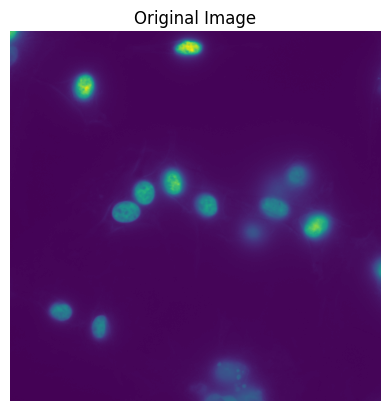

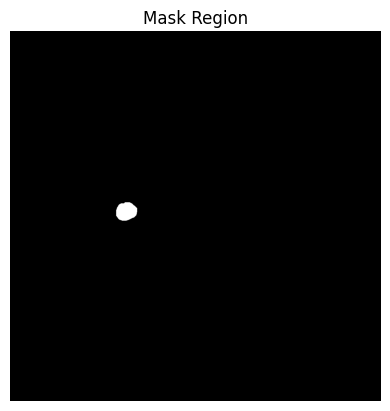

In [22]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.title('Original Image')
plt.axis('off')  # Hide the axis
plt.show()

plt.imshow(mask, cmap='gray')  # Display the mask in grayscale
plt.title('Mask Region')
plt.axis('off')
plt.show()


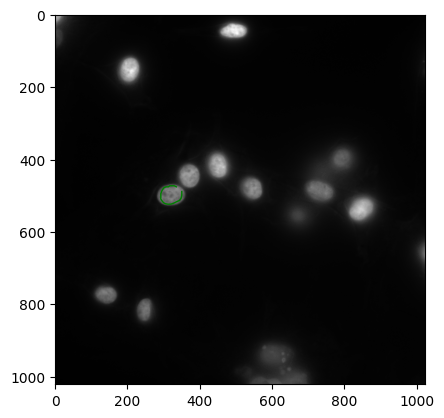

In [18]:
plt.imshow(image, cmap='gray')
plt.plot(polygon[:, 1], polygon[:, 0], color='green', linewidth=1)  # Draw polygon
plt.show()


In [61]:
disk_radius = 5
annulus_radius = 5
selem = morphology.disk(disk_radius)

mask2 = mask.squeeze()

dilated_mask = morphology.binary_dilation(mask2, selem)
annulus_mask = dilated_mask & ~mask2
#plt.imshow(dilated_mask, cmap='gray')

dilated_polygon = Polygon(polygon).buffer(annulus_radius)
dilated_mask2 = draw.polygon2mask(image.shape, np.array(dilated_polygon.exterior.coords)).squeeze()
annulus_mask2 = dilated_mask2 & ~mask2
#plt.imshow(dilated_mask2 & ~dilated_mask, cmap='gray')

In [62]:
intensities = image[annulus_mask]
intensities2 = image[annulus_mask2]

print(intensities.mean())
print(intensities2.mean())

11627.43746934772
11548.297245045916


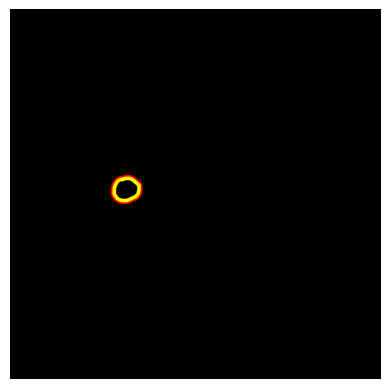

In [55]:

image_rgb = np.stack([image.squeeze()]*3, axis=-1)
overlay = np.zeros_like(image_rgb)
overlay[annulus_mask, 0] = 255
overlay[annulus_mask2, 1] = 255
combined_image = np.clip(image_rgb + overlay, 0, 255)

# Display the result
plt.imshow(overlay)
plt.axis('off')  # Hide the axis for better visualization
plt.show()


Below code is a way to test running through all the annotations and computing intensity. It shows how to group the annotations by image and then compute the intensity for each image, which is considerably faster because you don't have to reload the image every time.

In [22]:
from collections import defaultdict

channel = annotationList[0]['channel']

# 1. Group annotations by location using defaultdict
grouped_annotations = defaultdict(list)
for annotation in annotationList:
    location_key = (annotation['location']['Time'], annotation['location']['Z'], annotation['location']['XY'])
    grouped_annotations[location_key].append(annotation)

In [21]:
for location_key, annotations in grouped_annotations.items():
    time, z, xy = location_key
    frame = datasetClient.coordinatesToFrameIndex(xy, z, time, channel)
    image = datasetClient.getRegion(datasetId, frame=frame)

    if image is None:
        continue

    # 3. Compute properties for all annotations at that location
    for annotation in annotations:
        polygon = np.array([list(coordinate.values())[1::-1] for coordinate in annotation['coordinates']])
        mask = draw.polygon2mask(image.shape, polygon)
        intensities = image[mask]

        # Calculating the desired metrics
        mean_intensity = np.mean(intensities)
        max_intensity = np.max(intensities)
        min_intensity = np.min(intensities)
        median_intensity = np.median(intensities)
        q25_intensity = np.percentile(intensities, 25)
        q75_intensity = np.percentile(intensities, 75)
        total_intensity = np.sum(intensities)

        prop = {
            'MeanIntensity': float(mean_intensity),
            'MaxIntensity': float(max_intensity),
            'MinIntensity': float(min_intensity),
            'MedianIntensity': float(median_intensity),
            '25thPercentileIntensity': float(q25_intensity),
            '75thPercentileIntensity': float(q75_intensity),
            'TotalIntensity': float(total_intensity),
        }
        print(prop['MeanIntensity'])


dict_items([((0, 0, 0), [{'_id': '6504c0054bef1078719faf75', 'access': {'groups': [], 'users': [{'flags': [], 'id': '62891fc02060d362984bc104', 'level': 2}]}, 'channel': 1, 'coordinates': [{'x': 209, 'y': 614}, {'x': 206, 'y': 624}, {'x': 202, 'y': 628}, {'x': 194, 'y': 628}, {'x': 181, 'y': 622}, {'x': 180, 'y': 616}, {'x': 184, 'y': 608}, {'x': 193, 'y': 607}], 'datasetId': '6504bf104bef1078719faf21', 'location': {'Time': 0, 'XY': 0, 'Z': 0}, 'shape': 'polygon', 'tags': ['nucleus']}, {'_id': '6504c0e84bef1078719fb107', 'access': {'groups': [], 'users': [{'flags': [], 'id': '62891fc02060d362984bc104', 'level': 2}]}, 'channel': 1, 'coordinates': [{'x': 424, 'y': 325}, {'x': 422, 'y': 331}, {'x': 418, 'y': 335}, {'x': 406, 'y': 335}, {'x': 401, 'y': 333}, {'x': 399, 'y': 326}, {'x': 402, 'y': 321}, {'x': 410, 'y': 314}, {'x': 414, 'y': 310}, {'x': 421, 'y': 313}, {'x': 423, 'y': 318}], 'datasetId': '6504bf104bef1078719faf21', 'location': {'Time': 0, 'XY': 0, 'Z': 0}, 'shape': 'polygon',